In [1]:
#import all the required packages

import time                                             # for time functions
import random                                           # random state

import numpy as np                                      # for mathematical manipulations
import pandas as pd                                     # for dataframe related operations

import matplotlib.pyplot as plt                         # visualisation
import seaborn as sns                                   # visualisation
plt.style.use('fivethirtyeight')                        # styling the plots

from sklearn.cross_validation import train_test_split   # to split data into train and test sets
from sklearn.preprocessing import StandardScaler        # standardize data
from sklearn.decomposition import PCA                   # PCA
from sklearn.ensemble import RandomForestClassifier     # Classification

from sklearn.metrics import accuracy_score,recall_score,precision_score     #metrics
from sklearn.metrics import classification_report                           #metrics report

%matplotlib inline

C:\Users\majay\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Dataset information
[**SPECTF**](https://archive.ics.uci.edu/ml/machine-learning-databases/spect/) dataset from UCI machine learning repository

   The dataset describes diagnosing of cardiac Single Proton Emission Computed Tomography (SPECT) images.
   Each of the patients is classified into two categories: normal and abnormal.
   The database of 267 SPECT image sets (patients) was processed to extract features that summarize the original SPECT images.
   As a result, 44 continuous feature pattern was created for each patient.

In [2]:
#data source url
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spect/SPECTF.test'

#column names
col_names = ['target', 'F1R', 'F1S', 'F2R', 'F2S', 'F3R', 'F3S', 'F4R', 'F4S', 'F5R','F5S','F6R','F6S','F7R','F7S','F8R','F8S','F9R','F9S','F10R',
    'F10S',  'F11R','F11S','F12R','F12S','F13R','F13S','F14R','F14S','F15R','F15S','F16R','F16S','F17R','F17S','F18R','F18S','F19R','F19S',   'F20R',
    'F20S','F21R','F21S','F22R','F22S']

spectf= pd.read_table(url,sep=',',names=col_names)       # read with pandas

In [3]:
spectf.head()                                    # check the head of the data

,target,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
0,1,67,68,73,78,65,63,67,60,63,...,61,56,76,75,74,77,76,74,59,68
1,1,75,74,71,71,62,58,70,64,71,...,66,62,68,69,69,66,64,58,57,52
2,1,83,64,66,67,67,74,74,72,64,...,67,64,69,63,68,54,65,64,43,42
3,1,72,66,65,65,64,61,71,78,73,...,69,68,68,63,71,72,65,63,58,60
4,1,62,60,69,61,63,63,70,68,70,...,66,66,58,56,72,73,71,64,49,42


In [4]:
spectf.shape                                     # check the shape of the data

(187, 45)

the data set has 187 records and 45 variables

In [5]:
target=spectf['target']                          # store target column in a variable
spectf.drop('target',axis=1,inplace=True)        # drop the column from the dataframe

                            # split the data into train and test 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(spectf, target, random_state=123)

                    # train RandomForest classifier before applying PCA and measure the performance

In [7]:
rfClassifier=RandomForestClassifier(max_depth = 5, random_state = 1,n_estimators=1,max_leaf_nodes=10,max_features=10)
start=time.time()
rfClassifier.fit(X_train,y_train)              #fit data
end=time.time()
training_time_before_pca =end - start
print("Time taken to train the model {}.".format(training_time_before_pca))

Time taken to train the model 0.015034675598144531.


In [8]:
y_train_pred = rfClassifier.predict(X_train)               # predict on train data

#classification report of the train data
print(classification_report(y_train_pred,y_train))

             precision    recall  f1-score   support

          0       0.82      0.56      0.67        16
          1       0.95      0.98      0.96       124

avg / total       0.93      0.94      0.93       140



In [9]:
y_test_pred =rfClassifier.predict(X_test)                  # predict on test data

#classification report of the test data
print(classification_report(y_test_pred,y_test))

             precision    recall  f1-score   support

          0       0.25      0.25      0.25         4
          1       0.93      0.93      0.93        43

avg / total       0.87      0.87      0.87        47



                # save all the metrics

In [10]:
#train metrics
train_acc= accuracy_score(y_train_pred,y_train)            # train accuracy
train_recall= recall_score(y_train_pred,y_train)           # train recall
train_precision=precision_score(y_train_pred,y_train)      # train precision

#test metrics
test_acc= accuracy_score(y_test_pred,y_test)               # test accuracy
test_recall= recall_score(y_test_pred,y_test)              # test recall
test_precision=precision_score(y_test_pred,y_test)         # test precision

### PCA
Principal component analysis is a statistical procedure that uses an **orthogonal transformation** to convert a set of observations of possibly **correlated variables** into a set of values of **linearly uncorrelated variables** called principal components
- With PCA we can reduce the dimentions with out losing much information
- PCA also helps to remove the multicollinearity between the variables

In [11]:
# we have to standardize data before applying PCA
scaler=StandardScaler()                                # initialize the standard scaler
X_train_std = scaler.fit_transform(X_train)            # standardize the train data
X_test_std= scaler.transform(X_test)                   # standardize the test data
# apply PCA
pca = PCA().fit(X_train_std)                           # fit X_std data to PCA

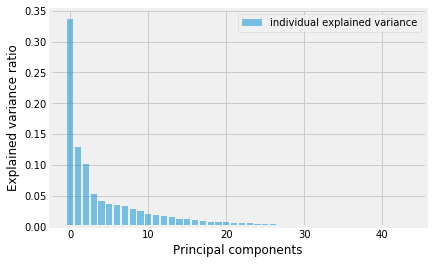

In [12]:
# plot individual variance percentage explained by the principal components

plt.bar(range(44), pca.explained_variance_ratio_, alpha=0.5,
            label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')

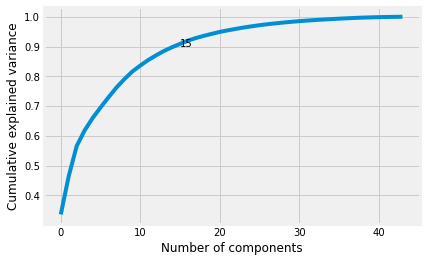

In [13]:
plt.plot(np.cumsum(pca.explained_variance_ratio_),
        label='Cumilative variance explained')               
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.annotate('15',xy=(15, .90))

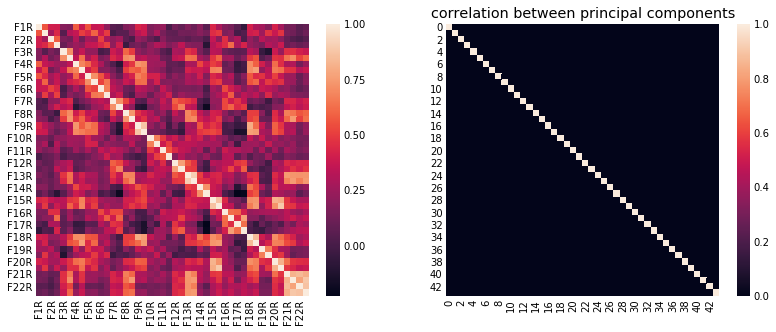

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(12,5))                        # multiple plots 
sns.heatmap(X_train.corr(), ax=ax1)                                           # plot 1 correlation between variables
sns.heatmap(pd.DataFrame(PCA().fit_transform(X_train_std)).corr(), ax=ax2)    # plot 2 correlation beteen principal components
plt.title('correlation between principal components')                         

### PCA
consider first 15 principal components as they are explaining 90% of variation in the data  

In [15]:
#consider first 15 components as they are explaining the 90% of variation in the data
x_pca = PCA(n_components=15)                            # initialise pca with 15 components
X_train_std_pca = x_pca.fit_transform(X_train_std)      # fit and transform train data
X_test_std_pca =x_pca.transform(X_test_std)             # transform test data

In [16]:
# train a RandomForest Classifier with train pca data
rfClassifier=RandomForestClassifier(max_depth = 2, n_estimators = 1, random_state = 1,max_features=3,max_leaf_nodes=9)
start=time.time()
rfClassifier.fit(X_train_std_pca,y_train)
end=time.time()
training_time_after_pca =end - start
print("Time taken to train the model with 15  components is {}.".format(training_time_after_pca))

Time taken to train the model with 15  components is 0.009010553359985352.


In [17]:
y_train_pred_pca = rfClassifier.predict(X_train_std_pca)       # predict with train pca data

#classification report of the pca train data
print(classification_report(y_train_pred_pca,y_train))

             precision    recall  f1-score   support

          0       0.64      0.30      0.41        23
          1       0.88      0.97      0.92       117

avg / total       0.84      0.86      0.84       140



In [18]:
y_test_pred_pca =rfClassifier.predict(X_test_std_pca)          # predict with test pca data

#classification report on pca applied test data
print(classification_report(y_test_pred_pca,y_test))

             precision    recall  f1-score   support

          0       0.25      0.20      0.22         5
          1       0.91      0.93      0.92        42

avg / total       0.84      0.85      0.84        47



In [19]:
# save all metrics
train_acc_pca= accuracy_score(y_train_pred_pca,y_train)        # training accuracy
train_recall_pca= recall_score(y_train_pred_pca,y_train)       # training recall
train_precision_pca=precision_score(y_train_pred_pca,y_train)  # training precision

test_acc_pca= accuracy_score(y_test_pred_pca,y_test)           # test accuracy
test_recall_pca= recall_score(y_test_pred_pca,y_test)          # test recall
test_precision_pca=precision_score(y_test_pred_pca,y_test)     # test precision

In [20]:
# store all metrics into lists
train=[train_acc,train_recall,train_precision]
test=[test_acc,test_recall,test_precision]
train_pca=[train_acc_pca,train_recall_pca,train_precision_pca]
test_pca=[test_acc_pca,test_recall_pca,test_precision_pca]

In [21]:
# make a dataframe of metrics 
metrics=pd.DataFrame([train,train_pca,test,test_pca],index=['train','train_pca','test','test_pca'])
metrics.columns=['accuracy','recall','precision']

In [22]:
# compare error metrics for train and test data, before and after applying PCA
metrics.T

,train,train_pca,test,test_pca
accuracy,0.935714,0.857143,0.872340,0.851064
recall,0.983871,0.965812,0.930233,0.928571
precision,0.945736,0.875969,0.930233,0.906977
